<h3>Requirements:</h3> 

These are also written in the Requirements.txt file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


<h1> Clean Up Data </h1>

<h2> Dataset 1 </h2>

This data comes from tables published by the United States Census Bureau and is the Median Household Income By State for years 1984 to 2021. It can be found here:  https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

If look at the original CSV file, h08.csv, the first few rows are messed up and there are some nested columns. After some trial and error, and to make it easier to be able to separate the data, I set the header to 3 to drop the first few rows and start the dataframe fresh.

In [2]:
# Reading in the CSV file for Household Income. I named it HHIncome for clarity, and set the header to 3.

HHIncome = pd.read_csv('h08.csv', header=3)
HHIncome

,State,2021,Unnamed: 2,2020 (41),Unnamed: 4,2019,Unnamed: 6,2018,Unnamed: 8,2017 (40),...,1988,Unnamed: 72,1987 (21),Unnamed: 74,1986,Unnamed: 76,1985 (20),Unnamed: 78,1984 (19),Unnamed: 80
0,NaN,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
1,United States,"70,784",368,"68,010",535,"68,703",550,"63,179",420,"61,136",...,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
2,Alabama,"56,929","2,294","54,689","2,563","56,200","2,512","49,936","2,423","50,865",...,"19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605
3,Alaska,"81,133","3,967","74,746","3,557","78,394","6,685","68,734","3,390","77,987",...,"33,103","1,183","33,233","1,497","31,356","1,017","34,782","1,089","32,356","1,473"
4,Arizona,"70,821","3,394","67,088","3,409","70,674","3,391","62,283","2,291","59,700",...,"26,435",843,"26,749",892,"25,500",718,"23,877",744,"21,425",609
5,Arkansas,"50,784","1,440","50,777","1,837","54,539","2,384","49,781","2,108","49,751",...,"20,172",706,"18,827","1,008","18,730",765,"17,451",764,"15,674",748
6,California,"81,575","1,219","77,652","1,437","78,105","1,850","70,489","1,233","70,038",...,"30,287",634,"30,146",538,"29,010",570,"26,981",350,"25,287",364
7,Colorado,"84,954","3,155","83,777","6,019","72,499","5,221","73,034","3,562","74,984",...,"26,214","1,285","26,476","1,075","27,192",926,"28,182",850,"25,801",805
8,Connecticut,"80,958","5,261","79,432","3,602","87,291","4,630","72,812","5,119","74,304",...,"36,213","1,293","32,862","1,362","32,721","1,605","31,090","1,129","29,951","1,238"
9,Delaware,"68,687","2,919","70,022","5,283","74,194","3,009","65,012","3,599","64,961",...,"30,505","1,167","29,244",875,"25,626","1,212","22,980","1,366","25,819","1,027"


In [3]:
#looking at the data to get an idea of what it looks like 

print(HHIncome.shape)
print(HHIncome.head())
HHIncome

(53, 81)
           State           2021      Unnamed: 2      2020 (41)  \
0            NaN  Median income  Standard error  Median income   
1  United States         70,784             368         68,010   
2        Alabama         56,929           2,294         54,689   
3         Alaska         81,133           3,967         74,746   
4        Arizona         70,821           3,394         67,088   

       Unnamed: 4           2019      Unnamed: 6           2018  \
0  Standard error  Median income  Standard error  Median income   
1             535         68,703             550         63,179   
2           2,563         56,200           2,512         49,936   
3           3,557         78,394           6,685         68,734   
4           3,409         70,674           3,391         62,283   

       Unnamed: 8      2017 (40)  ...           1988     Unnamed: 72  \
0  Standard error  Median income  ...  Median income  Standard error   
1             420         61,136  ...         2

,State,2021,Unnamed: 2,2020 (41),Unnamed: 4,2019,Unnamed: 6,2018,Unnamed: 8,2017 (40),...,1988,Unnamed: 72,1987 (21),Unnamed: 74,1986,Unnamed: 76,1985 (20),Unnamed: 78,1984 (19),Unnamed: 80
0,NaN,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,...,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
1,United States,"70,784",368,"68,010",535,"68,703",550,"63,179",420,"61,136",...,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
2,Alabama,"56,929","2,294","54,689","2,563","56,200","2,512","49,936","2,423","50,865",...,"19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605
3,Alaska,"81,133","3,967","74,746","3,557","78,394","6,685","68,734","3,390","77,987",...,"33,103","1,183","33,233","1,497","31,356","1,017","34,782","1,089","32,356","1,473"
4,Arizona,"70,821","3,394","67,088","3,409","70,674","3,391","62,283","2,291","59,700",...,"26,435",843,"26,749",892,"25,500",718,"23,877",744,"21,425",609
5,Arkansas,"50,784","1,440","50,777","1,837","54,539","2,384","49,781","2,108","49,751",...,"20,172",706,"18,827","1,008","18,730",765,"17,451",764,"15,674",748
6,California,"81,575","1,219","77,652","1,437","78,105","1,850","70,489","1,233","70,038",...,"30,287",634,"30,146",538,"29,010",570,"26,981",350,"25,287",364
7,Colorado,"84,954","3,155","83,777","6,019","72,499","5,221","73,034","3,562","74,984",...,"26,214","1,285","26,476","1,075","27,192",926,"28,182",850,"25,801",805
8,Connecticut,"80,958","5,261","79,432","3,602","87,291","4,630","72,812","5,119","74,304",...,"36,213","1,293","32,862","1,362","32,721","1,605","31,090","1,129","29,951","1,238"
9,Delaware,"68,687","2,919","70,022","5,283","74,194","3,009","65,012","3,599","64,961",...,"30,505","1,167","29,244",875,"25,626","1,212","22,980","1,366","25,819","1,027"


In [4]:
# I'm not going to be using the Standard Error columns, so let's drop those

HHIncome.drop(HHIncome.columns[HHIncome.columns.str.contains('unnamed',case = False)],
              axis = 1, inplace = True)
HHIncome

,State,2021,2020 (41),2019,2018,2017 (40),2017,2016,2015,2014,...,1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
0,NaN,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,...,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income
1,United States,"70,784","68,010","68,703","63,179","61,136","61,372","59,039","56,516","53,657",...,"31,241","30,636","30,126","29,943","28,906","27,225","26,061","24,897","23,618","22,415"
2,Alabama,"56,929","54,689","56,200","49,936","50,865","51,113","47,221","44,509","42,278",...,"25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
3,Alaska,"81,133","74,746","78,394","68,734","77,987","72,231","75,723","75,112","67,629",...,"42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
4,Arizona,"70,821","67,088","70,674","62,283","59,700","61,125","57,100","52,248","49,254",...,"30,510","29,358","30,737","29,224","28,552","26,435","26,749","25,500","23,877","21,425"
5,Arkansas,"50,784","50,777","54,539","49,781","49,751","48,829","45,907","42,798","44,922",...,"23,039","23,882","23,435","22,786","21,433","20,172","18,827","18,730","17,451","15,674"
6,California,"81,575","77,652","78,105","70,489","70,038","69,759","66,637","63,636","60,487",...,"34,073","34,903","33,664","33,290","33,009","30,287","30,146","29,010","26,981","25,287"
7,Colorado,"84,954","83,777","72,499","73,034","74,984","74,172","70,566","66,596","60,940",...,"34,488","32,484","31,499","30,733","26,806","26,214","26,476","27,192","28,182","25,801"
8,Connecticut,"80,958","79,432","87,291","72,812","74,304","72,780","75,923","72,889","70,161",...,"39,516","40,841","42,154","38,870","42,321","36,213","32,862","32,721","31,090","29,951"
9,Delaware,"68,687","70,022","74,194","65,012","64,961","62,318","58,046","57,756","57,522",...,"36,064","35,678","32,585","30,804","32,068","30,505","29,244","25,626","22,980","25,819"


In [5]:
# let's drop the rows past the years that we aren't looking for in the other dataset
# we'll be keeping 2021 - 2019

HHIncome.drop(HHIncome.iloc[:, 4:41], axis=1, inplace=True)
print(HHIncome)

                   State           2021      2020 (41)           2019
0                    NaN  Median income  Median income  Median income
1          United States         70,784         68,010         68,703
2                Alabama         56,929         54,689         56,200
3                 Alaska         81,133         74,746         78,394
4                Arizona         70,821         67,088         70,674
5               Arkansas         50,784         50,777         54,539
6             California         81,575         77,652         78,105
7               Colorado         84,954         83,777         72,499
8            Connecticut         80,958         79,432         87,291
9               Delaware         68,687         70,022         74,194
10  District of Columbia         90,640         88,218         93,111
11               Florida         59,734         57,763         58,368
12               Georgia         61,497         59,265         56,628
13                Ha

In [6]:
#let's rename the 2020 column to make it easier

HHIncome.rename(columns={"2020 (41)" : "2020"}, inplace=True)
print(HHIncome)

                   State           2021           2020           2019
0                    NaN  Median income  Median income  Median income
1          United States         70,784         68,010         68,703
2                Alabama         56,929         54,689         56,200
3                 Alaska         81,133         74,746         78,394
4                Arizona         70,821         67,088         70,674
5               Arkansas         50,784         50,777         54,539
6             California         81,575         77,652         78,105
7               Colorado         84,954         83,777         72,499
8            Connecticut         80,958         79,432         87,291
9               Delaware         68,687         70,022         74,194
10  District of Columbia         90,640         88,218         93,111
11               Florida         59,734         57,763         58,368
12               Georgia         61,497         59,265         56,628
13                Ha

In [7]:
# we can also just drop the row that says 'Median Income'
#since we know that's what this data is

HHIncome.drop(HHIncome.index[0], axis=0, inplace=True)
HHIncome

,State,2021,2020,2019
1,United States,"70,784","68,010","68,703"
2,Alabama,"56,929","54,689","56,200"
3,Alaska,"81,133","74,746","78,394"
4,Arizona,"70,821","67,088","70,674"
5,Arkansas,"50,784","50,777","54,539"
6,California,"81,575","77,652","78,105"
7,Colorado,"84,954","83,777","72,499"
8,Connecticut,"80,958","79,432","87,291"
9,Delaware,"68,687","70,022","74,194"
10,District of Columbia,"90,640","88,218","93,111"


When I glanced at the datatype for this dataframe, I noticed that every column was Object, which was weird. I realized that because the year columns, 2019 2020 and 2021, have a comma within the value, they are being counted as strings rather than integers. I converted those to integers for clarity.

In [8]:
# replacing the commas, and then converting the datatypes to a integer 

HHIncome.replace(',','', regex=True, inplace=True)

HHIncome[['2019', '2020', '2021']] = HHIncome[['2019', '2020', '2021']].astype('int')

HHIncome.dtypes

State    object
2021      int64
2020      int64
2019      int64
dtype: object

I knew that I wanted to merge the datasets on the State column, but the way the year columns were formatted made it possible that the merged dataframe would look odd. After doing some research I stumbled into pandas.melt, which unpivoted the Dataframe from wide to long format and allowed me to have a Year column that would match nicely with Dataset 2. 

In [9]:
#using pandas.melt, which unpivots the DataFrame from wide to long format and gives me a Year column

HHIncomeM = HHIncome.melt(id_vars=["State"], 
        var_name="Year", 
        value_name="HHIncome")
print(HHIncomeM)

             State  Year  HHIncome
0    United States  2021     70784
1          Alabama  2021     56929
2           Alaska  2021     81133
3          Arizona  2021     70821
4         Arkansas  2021     50784
..             ...   ...       ...
151       Virginia  2019     81313
152     Washington  2019     82454
153  West Virginia  2019     53706
154      Wisconsin  2019     67355
155        Wyoming  2019     65134

[156 rows x 3 columns]


<h2> Dataset 2 </h2>

This data set is provided by the US government as part of their Surveillance Reports from the National Institute on Alcohol Abuse and Alcoholism. It contains per capita alcohol sales between the years of 2017-2021 of beer, wine and spirits during the pandemic for 13 states so far. The link can be found here: https://pubs.niaaa.nih.gov/publications/surveillance-covid-19/COVSALES.htm


In [10]:
#read in CSV file for US Alcohol Sales

Alcohol = pd.read_csv('Data-Table1.csv')
Alcohol

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
0,2017,1,2,1,103645.0,42598,594304,0.0717,NaN,NaN
1,2017,1,8,1,733857.0,301615,4639112,0.0650,NaN,NaN
2,2017,1,9,1,412100.0,169373,3017061,0.0561,NaN,NaN
3,2017,1,10,1,180388.0,74139,800398,0.0926,NaN,NaN
4,2017,1,12,1,2770686.0,1138752,17733837,0.0642,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2907,2021,8,27,4,NaN,1248935,4652447,0.2684,0.2577,0.0416
2908,2021,8,29,4,NaN,1212586,5093948,0.2380,0.2236,0.0646
2909,2021,8,38,4,NaN,187757,620677,0.3025,0.2730,0.1082
2910,2021,8,47,4,NaN,1173051,5718921,0.2051,0.1785,0.1491


In [11]:
#looking at the data to get an idea of what it looks like

print(Alcohol.shape)
print(Alcohol.head())

(2912, 10)
   Year  Month  FIPS  Beverage    Gallons  Ethanol  Population  PerCapita  \
0  2017      1     2         1   103645.0    42598      594304     0.0717   
1  2017      1     8         1   733857.0   301615     4639112     0.0650   
2  2017      1     9         1   412100.0   169373     3017061     0.0561   
3  2017      1    10         1   180388.0    74139      800398     0.0926   
4  2017      1    12         1  2770686.0  1138752    17733837     0.0642   

   PerCapita3yr  PctChange  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  


In [12]:
#we are working with years 2019-2021, so let's drop the rows that include the other years

Alcohol.drop(Alcohol[Alcohol['Year'] <= 2018].index, inplace = True)
Alcohol

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange
1248,2019,1,2,1,112835.0,46375,591039,0.0785,NaN,NaN
1249,2019,1,8,1,889500.0,365585,4791946,0.0763,NaN,NaN
1250,2019,1,9,1,614817.0,252690,3019599,0.0837,NaN,NaN
1251,2019,1,10,1,210789.0,86634,818920,0.1058,NaN,NaN
1252,2019,1,12,1,3281500.0,1348697,18218901,0.0740,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2907,2021,8,27,4,NaN,1248935,4652447,0.2684,0.2577,0.0416
2908,2021,8,29,4,NaN,1212586,5093948,0.2380,0.2236,0.0646
2909,2021,8,38,4,NaN,187757,620677,0.3025,0.2730,0.1082
2910,2021,8,47,4,NaN,1173051,5718921,0.2051,0.1785,0.1491


In [13]:
# the last two columns are mostly empty of data so they can be dropped as well
# I will also not be using the PerCapita or Ethanol columns at the moment so I'll drop those too

Alcohol.drop(Alcohol.columns[[5, 7, 8, 9]], axis = 1, inplace=True)
Alcohol

,Year,Month,FIPS,Beverage,Gallons,Population
1248,2019,1,2,1,112835.0,591039
1249,2019,1,8,1,889500.0,4791946
1250,2019,1,9,1,614817.0,3019599
1251,2019,1,10,1,210789.0,818920
1252,2019,1,12,1,3281500.0,18218901
...,...,...,...,...,...,...
2907,2021,8,27,4,NaN,4652447
2908,2021,8,29,4,NaN,5093948
2909,2021,8,38,4,NaN,620677
2910,2021,8,47,4,NaN,5718921


In [14]:
#let's make sure we get rid of all null entries and drop those too
#once we do these we go from 1664 rows to 1248 rows

Alcohol.dropna(inplace=True)
print(Alcohol)

      Year  Month  FIPS  Beverage     Gallons  Population
1248  2019      1     2         1    112835.0      591039
1249  2019      1     8         1    889500.0     4791946
1250  2019      1     9         1    614817.0     3019599
1251  2019      1    10         1    210789.0      818920
1252  2019      1    12         1   3281500.0    18218901
...    ...    ...   ...       ...         ...         ...
2894  2021      8    27         3  10841848.0     4652447
2895  2021      8    29         3  11128509.0     5093948
2896  2021      8    38         3   2069134.0      620677
2897  2021      8    47         3  11625691.0     5718921
2898  2021      8    48         3  58112092.0    23608900

[1248 rows x 6 columns]


In the Assets/ folder, the Definitions.csv file shows a table that details the pairing of the numerical values with their string counterparts for the State names, and the alcoholic Beverages.

In [15]:
#Rename FIPS column to State, so that it's more clear

Alcohol.rename(columns={"FIPS" : "State"}, inplace=True)
print(Alcohol)

      Year  Month  State  Beverage     Gallons  Population
1248  2019      1      2         1    112835.0      591039
1249  2019      1      8         1    889500.0     4791946
1250  2019      1      9         1    614817.0     3019599
1251  2019      1     10         1    210789.0      818920
1252  2019      1     12         1   3281500.0    18218901
...    ...    ...    ...       ...         ...         ...
2894  2021      8     27         3  10841848.0     4652447
2895  2021      8     29         3  11128509.0     5093948
2896  2021      8     38         3   2069134.0      620677
2897  2021      8     47         3  11625691.0     5718921
2898  2021      8     48         3  58112092.0    23608900

[1248 rows x 6 columns]


In [16]:
# These are lists for the State and Beverage columns

statelist = ['Alaska','Colorado','Connecticut','Delaware','Florida','Illinois','Kentucky',
             'Massachusetts','Minnesota','Missouri','North Dakota','Tennessee','Texas' ]
print(statelist)

alclist = ['spirits','wine','beer']

print(alclist)

['Alaska', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Illinois', 'Kentucky', 'Massachusetts', 'Minnesota', 'Missouri', 'North Dakota', 'Tennessee', 'Texas']
['spirits', 'wine', 'beer']


In order to change this data, we'll have to change the dtype of those columns to string, since we're replacing numerical data with a word. 

In [17]:
# converting dtypes  

Alcohol[['State', 'Beverage', 'Year']] = Alcohol[['State', 'Beverage', 'Year']].astype('str')


Alcohol['Gallons'] = Alcohol['Gallons'].astype(int)

print(Alcohol.dtypes)

Year          object
Month          int64
State         object
Beverage      object
Gallons        int64
Population     int64
dtype: object


In [18]:
#using the lists we made earlier for the Beverages and States, we can now replace the values 
# in the dataframe using the pandas.DataFrame.replace function

Alcohol['Beverage'] = Alcohol['Beverage'].replace(['1', '2', '3'], alclist)
Alcohol['State'] = Alcohol['State'].replace(['2','8','9','10','12','17','21','25','27','29','38','47','48'], 
                                  statelist)

Alcohol

,Year,Month,State,Beverage,Gallons,Population
1248,2019,1,Alaska,spirits,112835,591039
1249,2019,1,Colorado,spirits,889500,4791946
1250,2019,1,Connecticut,spirits,614817,3019599
1251,2019,1,Delaware,spirits,210789,818920
1252,2019,1,Florida,spirits,3281500,18218901
...,...,...,...,...,...,...
2894,2021,8,Minnesota,beer,10841848,4652447
2895,2021,8,Missouri,beer,11128509,5093948
2896,2021,8,North Dakota,beer,2069134,620677
2897,2021,8,Tennessee,beer,11625691,5718921


<h1> Merging Datasets </h1>

Let's merge these two datasets on the columns of State and Year. I chose an inner join because I felt it worked best with this data. 

This first join is the generic panda merge, to see what it would look like. 

Then I try to specifically merge these datasets, Alcohol and HHIncomeM, using an inner join on the columns State and Year. 

In [19]:
merged_df = pd.merge(HHIncomeM, Alcohol)
merged_df

,State,Year,HHIncome,Month,Beverage,Gallons,Population
0,Alaska,2021,81133,1,spirits,131868,590127
1,Alaska,2021,81133,1,wine,158078,590127
2,Alaska,2021,81133,1,beer,870907,590127
3,Alaska,2021,81133,2,spirits,120677,590127
4,Alaska,2021,81133,2,wine,165168,590127
...,...,...,...,...,...,...,...
1243,Texas,2019,67444,11,wine,5089297,23242391
1244,Texas,2019,67444,11,beer,55166861,23242391
1245,Texas,2019,67444,12,spirits,3765449,23242391
1246,Texas,2019,67444,12,wine,5451990,23242391


In [20]:
merged_df = Alcohol.merge(HHIncomeM, on=['State', 'Year'], how='inner')
merged_df

,Year,Month,State,Beverage,Gallons,Population,HHIncome
0,2019,1,Alaska,spirits,112835,591039,78394
1,2019,1,Alaska,wine,147783,591039,78394
2,2019,1,Alaska,beer,873240,591039,78394
3,2019,2,Alaska,spirits,121494,591039,78394
4,2019,2,Alaska,wine,167047,591039,78394
...,...,...,...,...,...,...,...
1243,2021,7,Texas,wine,5386346,23608900,67404
1244,2021,7,Texas,beer,63661471,23608900,67404
1245,2021,8,Texas,spirits,3311277,23608900,67404
1246,2021,8,Texas,wine,4728152,23608900,67404


I wanted a way to really be able to look at all of the data in this merged dataframe, so I figured out a way to export it as an Excel sheet. I feel like that's a piece of code that I'm definitely going to take with me for future use.  

In [21]:
# code to export dataframe as an Excel sheet; it should generate in the same folder that this notebook is in. 

writer = pd.ExcelWriter('output.xlsx')
merged_df.to_excel(writer)

writer.save()

<h1> Data Analysis </h1>

Let's do some exploratory data analysis to see what we have with this merged dataset of Alcohol Sales and Median Household income. 

In [22]:
# let's look at the dtypes of the merged dataframe

merged_df.dtypes

Year          object
Month          int64
State         object
Beverage      object
Gallons        int64
Population     int64
HHIncome       int64
dtype: object

In [23]:
#total gallons of alcohol sold per state, per year

gallons_state_year = merged_df.groupby(['State', 'Year'])['Gallons'].sum()

print(gallons_state_year)

State          Year
Alaska         2019     18357990
               2020     17612940
               2021     12567393
Colorado       2019    155351900
               2020    156881600
               2021    108427556
Connecticut    2019     75892130
               2020     75255031
               2021     49693212
Delaware       2019     27956576
               2020     29857586
               2021     20921476
Florida        2019    553780977
               2020    555877101
               2021    388769946
Illinois       2019    310240713
               2020    304777995
               2021    206334816
Kentucky       2019     86916374
               2020     90337905
               2021     64688094
Massachusetts  2019    161212178
               2020    155496755
               2021    106420990
Minnesota      2019    144715054
               2020    145709950
               2021    102988870
Missouri       2019    151456066
               2020    153190121
               2021    

In [24]:
#average gallons of alcohol sold by state

gallonavg = merged_df.groupby('State')['Gallons'].aggregate(['mean'])
print(gallonavg)

                       mean
State                      
Alaska         5.056075e+05
Colorado       4.381886e+06
Connecticut    2.092087e+06
Delaware       8.201629e+05
Florida        1.560863e+07
Illinois       8.555766e+06
Kentucky       2.520233e+06
Massachusetts  4.407603e+06
Minnesota      4.098061e+06
Missouri       4.277848e+06
North Dakota   6.808547e+05
Tennessee      4.268378e+06
Texas          2.084111e+07


In [25]:
#expression for the smallest (Min) and largest (Max) amount of gallons sold per state

gallonminmax = merged_df.groupby('State')['Gallons'].aggregate(['min', 'max'])
print(gallonminmax)

                   min       max
State                           
Alaska          112835   1706457
Colorado        692800  12669491
Connecticut     538158   5764363
Delaware         61255   2392080
Florida        3269153  40998664
Illinois       1121828  25813940
Kentucky        332586   9143512
Massachusetts   715974  12279204
Minnesota       901183  12253292
Missouri        825776  15450133
North Dakota     90482   2181266
Tennessee       837058  12037149
Texas          2996012  69340788


Just looking at this, it's fairly easy to see that Florida and Texas have the lead when it comes to alcohol sales

In [26]:
#expression for smallest (Min) and largest (Max) median Household Income per state

incomeminmax = merged_df.groupby('State')['HHIncome'].aggregate(['min', 'max'])
print(incomeminmax)

                 min    max
State                      
Alaska         74746  81133
Colorado       72499  84954
Connecticut    79432  87291
Delaware       68687  74194
Florida        57763  59734
Illinois       74334  79253
Kentucky       55629  56755
Massachusetts  86566  87812
Minnesota      78753  81426
Missouri       60597  63594
North Dakota   64115  70031
Tennessee      54975  62166
Texas          67404  68404


In my opinion, the median household incomes don't differ on a huge amount. Most of the states are in the 60-70k range. Interestingly enough, Massachusetts seems to have an abundance of wealth with 86k.

In [27]:
# average median household income per state

incomeavg = merged_df.groupby('State')['HHIncome'].aggregate(['mean'])
print(incomeavg)

                    mean
State                   
Alaska         77710.750
Colorado       79842.000
Connecticut    82760.625
Delaware       71252.750
Florida        58482.625
Illinois       75588.125
Kentucky       56063.625
Massachusetts  87461.125
Minnesota      80177.375
Missouri       61939.125
North Dakota   67525.250
Tennessee      57392.250
Texas          67794.000


This expression shows the average median household income over the 3 years that we were looking at, 2019, 2020 and 2021. 

In [28]:
# average median household income by year

income_year_avg = merged_df.groupby('Year')['HHIncome'].aggregate(['mean'])
print(income_year_avg)

              mean
Year              
2019  71126.076923
2020  70235.846154
2021  72261.615385


This expression really shows that overall the median household income wasn't changed much by the pandemic. There was a slight dip in 2020, but it looks like in 2021 the US did better than they had the previous 2 years. 

In [29]:
#correlation of alcohol sold and income

corr=merged_df['Gallons'].corr(merged_df['HHIncome'])
print(corr)


-0.13506912981383742


When we correlate the Gallons and HHIncome columns, we get a correlation coefficient of -0.135. This indicates that there is a negative correlation between the two values, meaning that as the amount of Gallons increases, the household income decreases. However, since the number is so close to 0, that indicates that the relationship is not very strong. 

In [30]:
# this exresssion shows the correlation between all columns in the dataset
merged_df.corr()

,Month,Gallons,Population,HHIncome
Month,1.000000,0.021912,-0.000481,-0.017295
Gallons,0.021912,1.000000,0.566007,-0.135069
Population,-0.000481,0.566007,1.000000,-0.249537
HHIncome,-0.017295,-0.135069,-0.249537,1.000000


Looking at this chart we can see again that Gallons and HHIncome have a weak negative relationship. 
We can also tell that : 
- Population and Gallons has a moderately strong positive relationship, which means that as the population increases, the amount of alcohol sold increases as well. 
- Population and HHIncome have a negative relationship; as the population increases, the median household income will decrease. This correlation is slightly stronger than the one between Gallons and HHIncome, but still fairly weak.
       

<h1> Visualizations </h1>

<AxesSubplot:>

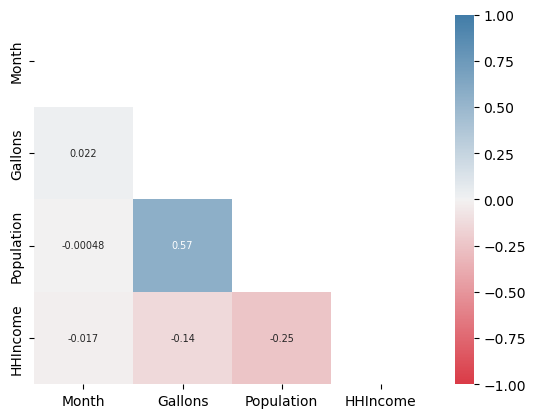

In [31]:
# heatmap to show the correlation between the columns of the merged dataframe

corrmat = merged_df.corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(10,600,as_cmap=True))

This chart demonstrates visually the correlation between all of the columns in the merged dataframe.
Remember:
- 1 is a strong positive relationship; both values increase because they are directly related.
- -1 is a strong negative relationship; as one value increases, the other will decrease. 
- 0 means that there is no correlation. 

<h3> Tableau Visuals </h3>

I attempted to make some Tableau charts with the merged data frame. I put those all in a dashboard as well, which is listed below. 

These are embedded using the Tableau public links. If for some reason there is trouble viewing these, I have them linked as both the workbooks and the images in the Tableau folder as well. 

In [32]:
%%html
<div class='tableauPlaceholder' id='viz1680187942824' style='position: relative'><noscript><a href='#'><img alt='Average Gallons Sold Per State, by Beverage ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome&#47;Graph2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GallonsHHIncome&#47;Graph2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome&#47;Graph2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1680187942824');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

This table shows that overall, beer is winning with alcohol sales. It's the majority of the sales in every state, and we can really see that Florida and Texas are beating the other states by far. 

In [33]:
%%html
<div class='tableauPlaceholder' id='viz1680188197465' style='position: relative'><noscript><a href='#'><img alt='Total Gallons Sold Per State By Year ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome2&#47;Graph3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GallonsHHIncome2&#47;Graph3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome2&#47;Graph3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1680188197465');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

This table breaks down visually the alcohol sales for every year, for every state. In the majority of the states we can see that 2019 and 2020 are usually pretty close, and then drops off in 2021. Obviously with this data we can't tell the reason for that drop off but it's interesting to see by state rather than just the average for each year.

In [34]:
%%html
<div class='tableauPlaceholder' id='viz1680188253402' style='position: relative'><noscript><a href='#'><img alt='Average Gallons Sold and Household Income per State ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome1&#47;Graph1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GallonsHHIncome1&#47;Graph1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome1&#47;Graph1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1680188253402');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

This chart overlays the Average of Gallons sold and Average Household Income, by state. Obviously we are working with different ranges, with Gallons being measured in Millions and Income being measured in Thousands. However, you can kind of see that the positions of the values by state are fairly similar, which echoes that -0.135 correlation coefficient we got earlier in our calculations. 

In [35]:
%%html
<div class='tableauPlaceholder' id='viz1680224238490' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome_D&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GallonsHHIncome_D&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ga&#47;GallonsHHIncome_D&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1680224238490');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1366px';vizElement.style.height='795px';} else { vizElement.style.width='100%';vizElement.style.height='1027px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


This is the dashboard of the Tableau images put together.

<h1> Summary </h1>

In merging these datasets I wanted to see if income would have a huge effect on the total alcohol sales. It appears that there's a slight negative relationship, but it's not the biggest factor or indicator of a state's total sales. 
Obviously there are limitations with the data collected; the Alcohol dataset only collects for 13 states. In the future I would want to see if I could find other factors, perhaps other datasets that would help account for why alcohol sales differ within each state (other than population). 